## Fig.2 Seed-to-Voxel Correlations

NOTE: This script requires a local installation of Workbench Command (https://www.humanconnectome.org/software/connectome-workbench)

In [1]:
import os
import glob
import subprocess
import pandas as pd
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Plotting parameters

In [8]:
# Import inflated fslr surfaces and sulci for shading
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
sulc_lh, sulc_rh = surfaces['sulc']

# Set data directory
out_dir = r'/Users/katerina/Desktop/DevCerebToM/figures/seed_to_voxel'

# Set surface directory for surface projection of volumetric data
surf_dir = r'/Users/katerina/Desktop/cerebellum/group_surfaces'

## R Crus I (found in all children) 

### One-sample t-test

In [ ]:
# Define seed 
seed = "r_crus_I_all"

# Turn NIfTI to surface for plotting

# Use glob to find the input files
input_file = glob.glob(os.path.join(out_dir, f"{seed}/all_children_{seed}_stv_one_sample_fdr.nii"))

# Use glob to find the left and right surface files
left_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii"))
right_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii"))

# Check if files were found
if input_file and left_surface and right_surface:
    input_file = input_file[0]
    left_surface = left_surface[0]
    right_surface = right_surface[0]

    # Get output filename
    seed_output_file = os.path.join(out_dir, f"all_children_{seed}_stv_one_sample_fdr")

    # Perform wb_command calls
    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {left_surface} {seed_output_file}.L.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {right_surface} {seed_output_file}.R.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -cifti-create-dense-scalar {seed_output_file}.dscalar.nii "
        f"-left-metric {seed_output_file}.L.shape.gii -right-metric {seed_output_file}.R.shape.gii",
        shell=True
    )
else:
    print(f"Files not found for seed: {seed}")

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

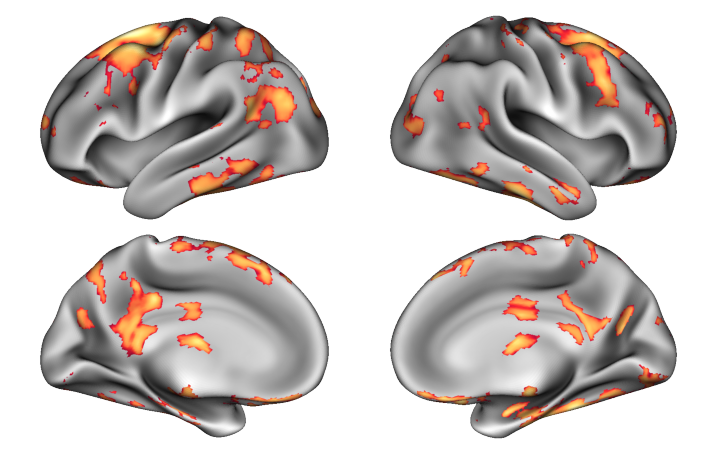

In [17]:
# Load FDR map projected on fslr surface with wb_command for plotting
seed = "r_crus_I_all"

fn = os.path.join(out_dir, f"{seed}/all_children_{seed}_stv_one_sample_fdr.dscalar.nii")
dat = nib.load(fn)

# Plot positive activations only
dat_f = dat.get_fdata()
dat_f[dat_f<1] = 0
dat_pos = nib.Cifti2Image(dat_f, header=dat.header)

# Plot
p = Plot(lh, rh, size=(800, 500), zoom=1.7, mirror_views=True)
p.add_layer({'right': sulc_rh, 'left': sulc_lh}, cmap='binary_r', cbar=False)
p.add_layer(dat_pos, cmap='YlOrRd_r', cbar = False)
fig = p.build()
fig.show

### Two-sample t-test (passers > non-passers)

In [ ]:
# Turn NIfTI to surface for plotting

# Use glob to find the input files
input_file = glob.glob(os.path.join(out_dir, f"{seed}/{seed}_stv_two_sample_fdr.nii"))

# Use glob to find the left and right surface files
left_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii"))
right_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii"))

# Check if files were found
if input_file and left_surface and right_surface:
    input_file = input_file[0]
    left_surface = left_surface[0]
    right_surface = right_surface[0]

    # Get output filename
    seed_output_file = os.path.join(out_dir, f"{seed}_stv_two_sample_fdr")

    # Perform wb_command calls
    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {left_surface} {seed_output_file}.L.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {right_surface} {seed_output_file}.R.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -cifti-create-dense-scalar {seed_output_file}.dscalar.nii "
        f"-left-metric {seed_output_file}.L.shape.gii -right-metric {seed_output_file}.R.shape.gii",
        shell=True
    )
else:
    print(f"Files not found for seed: {seed}")

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

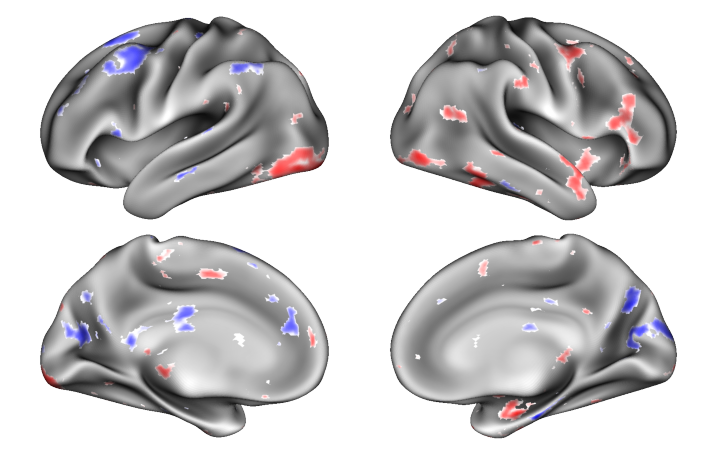

In [19]:
# Load FDR map projected on fslr surface with wb_command for plotting
fn = os.path.join(out_dir, f"{seed}/{seed}_stv_two_sample_fdr.dscalar.nii")
dat = nib.load(fn)

# Rescale color bar
dat_f = dat.get_fdata()
dat_f = np.clip(dat_f, -3.8, 3.9)
dat_r = nib.Cifti2Image(dat_f, header=dat.header)

# Plot positive activations only
dat_f = dat.get_fdata()
dat_f[dat_f<1] = 0
dat_pos = nib.Cifti2Image(dat_f, header=dat.header)

# Plot
p = Plot(lh, rh, size=(800, 500), zoom=1.7, mirror_views=True)
p.add_layer({'right': sulc_rh, 'left': sulc_lh}, cmap='binary_r', cbar=False)
p.add_layer(dat_r, cmap='bwr', cbar = False)
fig = p.build()
fig.show

## R Crus II (found in passers) 

### One-sample t-test

In [ ]:
# Define seed 
seed = "r_crus_II_pass"

# Turn NIfTI to surface for plotting

# Use glob to find the input files
input_file = glob.glob(os.path.join(out_dir, f"/{seed}/pass_{seed}_stv_one_sample_fdr.nii"))

# Use glob to find the left and right surface files
left_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii"))
right_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii"))

# Check if files were found
if input_file and left_surface and right_surface:
    input_file = input_file[0]
    left_surface = left_surface[0]
    right_surface = right_surface[0]

    # Get output filename
    seed_output_file = os.path.join(out_dir, f"pass_{seed}_stv_one_sample_fdr")

    # Perform wb_command calls
    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {left_surface} {seed_output_file}.L.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {right_surface} {seed_output_file}.R.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -cifti-create-dense-scalar {seed_output_file}.dscalar.nii "
        f"-left-metric {seed_output_file}.L.shape.gii -right-metric {seed_output_file}.R.shape.gii",
        shell=True
    )
else:
    print(f"Files not found for seed: {seed}")

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

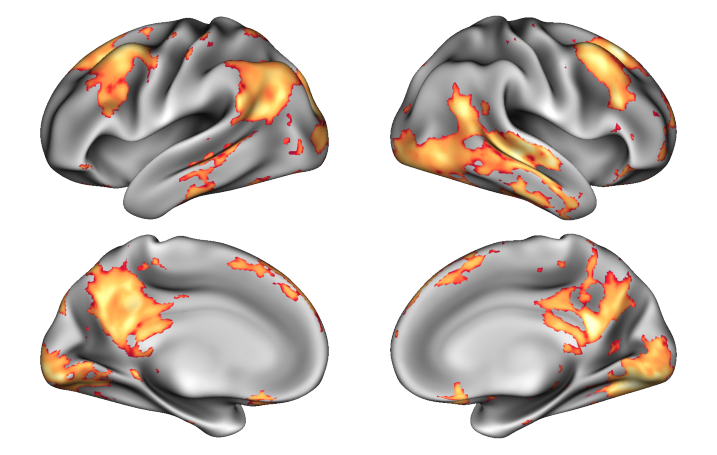

In [36]:
# Load FDR map projected on fslr surface with wb_command for plotting
seed = "r_crus_II_pass"

fn = os.path.join(out_dir, f"{seed}/pass_{seed}_stv_one_sample_fdr.dscalar.nii")
dat = nib.load(fn)

# Plot positive activations only
dat_f = dat.get_fdata()
dat_f[dat_f<1] = 0
dat_pos = nib.Cifti2Image(dat_f, header=dat.header)

# Plot
p = Plot(lh, rh, size=(800, 500), zoom=1.7, mirror_views=True)
p.add_layer({'right': sulc_rh, 'left': sulc_lh}, cmap='binary_r', cbar=False)
p.add_layer(dat_pos, cmap='YlOrRd_r', cbar = False)
fig = p.build()
fig.show

### Two-sample t-test (passers > non-passers)

In [ ]:
# Turn NIfTI to surface for plotting

# Use glob to find the input files
input_file = glob.glob(os.path.join(out_dir, f"/{seed}/{seed}_stv_two_sample_fdr.nii"))

# Use glob to find the left and right surface files
left_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii"))
right_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii"))

# Check if files were found
if input_file and left_surface and right_surface:
    input_file = input_file[0]
    left_surface = left_surface[0]
    right_surface = right_surface[0]

    # Get output filename
    seed_output_file = os.path.join(out_dir, f"{seed}_stv_two_sample_fdr")

    # Perform wb_command calls
    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {left_surface} {seed_output_file}.L.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {right_surface} {seed_output_file}.R.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -cifti-create-dense-scalar {seed_output_file}.dscalar.nii "
        f"-left-metric {seed_output_file}.L.shape.gii -right-metric {seed_output_file}.R.shape.gii",
        shell=True
    )
else:
    print(f"Files not found for seed: {seed}")

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

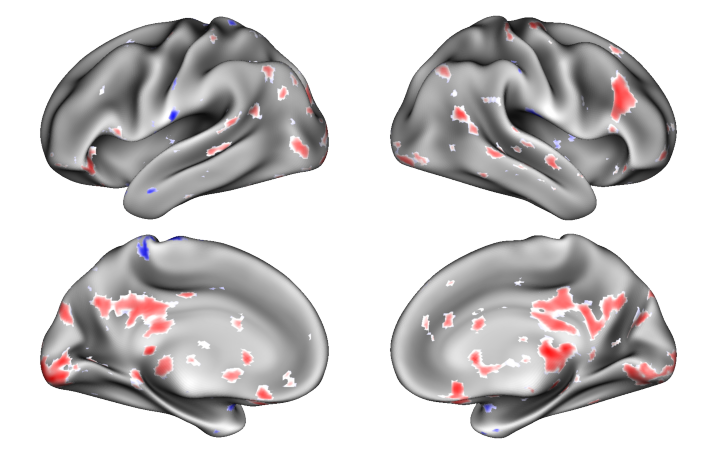

In [37]:
# Load FDR map projected on fslr surface with wb_command for plotting
fn = os.path.join(out_dir, f"{seed}/{seed}_stv_two_sample_fdr.dscalar.nii")
dat = nib.load(fn)

# Rescale color bar
dat_f = dat.get_fdata()
dat_f = np.clip(dat_f, -3.8, 3.9)
dat_r = nib.Cifti2Image(dat_f, header=dat.header)

# Plot positive activations only
dat_f = dat.get_fdata()
dat_f[dat_f<1] = 0
dat_pos = nib.Cifti2Image(dat_f, header=dat.header)

# Plot
p = Plot(lh, rh, size=(800, 500), zoom=1.7, mirror_views=True)
p.add_layer({'right': sulc_rh, 'left': sulc_lh}, cmap='binary_r', cbar=False)
p.add_layer(dat_r, cmap='bwr', cbar = False)
fig = p.build()
fig.show

## R Crus II (found in adults)

### Two-sample t-test (adults vs. passers)

In [ ]:
# Define seed 
seed = "r_crus_II_adults"

# Turn NIfTI to surface for plotting

# Use glob to find the input files
input_file = glob.glob(os.path.join(out_dir, f"/{seed}/{seed}_pass_stv_two_sample_fdr.nii"))

# Use glob to find the left and right surface files
left_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii"))
right_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii"))

# Check if files were found
if input_file and left_surface and right_surface:
    input_file = input_file[0]
    left_surface = left_surface[0]
    right_surface = right_surface[0]

    # Get output filename
    seed_output_file = os.path.join(out_dir, f"{seed}_pass_stv_two_sample_fdr")

    # Perform wb_command calls
    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {left_surface} {seed_output_file}.L.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {right_surface} {seed_output_file}.R.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -cifti-create-dense-scalar {seed_output_file}.dscalar.nii "
        f"-left-metric {seed_output_file}.L.shape.gii -right-metric {seed_output_file}.R.shape.gii",
        shell=True
    )
else:
    print(f"Files not found for seed: {seed}")

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

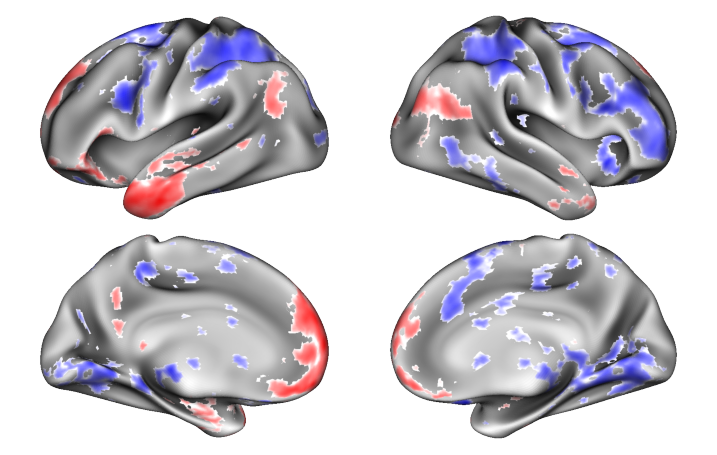

In [30]:
# Load FDR map projected on fslr surface with wb_command for plotting
seed = "r_crus_II_adults"

fn = os.path.join(out_dir, f"{seed}/{seed}_pass_stv_two_sample_fdr.dscalar.nii")
dat = nib.load(fn)

# Rescale color bar
dat_f = dat.get_fdata()
dat_f = np.clip(dat_f, -4.46, 4.46)
dat_r = nib.Cifti2Image(dat_f, header=dat.header)

# Plot positive activations only
dat_f = dat.get_fdata()
dat_f[dat_f<1] = 0
dat_pos = nib.Cifti2Image(dat_f, header=dat.header)

# Plot
p = Plot(lh, rh, size=(800, 500), zoom=1.7, mirror_views=True)
p.add_layer({'right': sulc_rh, 'left': sulc_lh}, cmap='binary_r', cbar=False)
p.add_layer(dat_r, cmap='bwr', cbar = False)
fig = p.build()
fig.show

### Two-sample t-test (adults vs. non-passers)

In [ ]:
# Turn NIfTI to surface for plotting

# Use glob to find the input files
input_file = glob.glob(os.path.join(out_dir, f"/{seed}/{seed}_fail_stv_two_sample_fdr.nii"))

# Use glob to find the left and right surface files
left_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii"))
right_surface = glob.glob(os.path.join(surf_dir, f"Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii"))

# Check if files were found
if input_file and left_surface and right_surface:
    input_file = input_file[0]
    left_surface = left_surface[0]
    right_surface = right_surface[0]

    # Get output filename
    seed_output_file = os.path.join(out_dir, f"{seed}_fail_stv_two_sample_fdr")

    # Perform wb_command calls
    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {left_surface} {seed_output_file}.L.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -volume-to-surface-mapping {input_file} {right_surface} {seed_output_file}.R.shape.gii -trilinear",
        shell=True
    )

    subprocess.check_output(
        f"wb_command -cifti-create-dense-scalar {seed_output_file}.dscalar.nii "
        f"-left-metric {seed_output_file}.L.shape.gii -right-metric {seed_output_file}.R.shape.gii",
        shell=True
    )
else:
    print(f"Files not found for seed: {seed}")

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

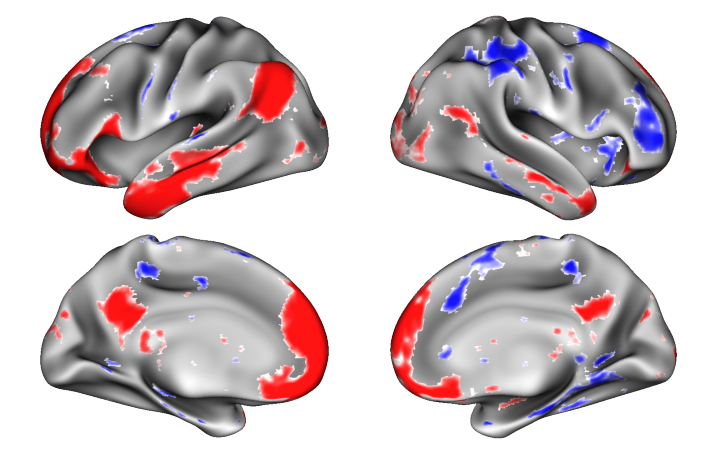

In [29]:
# Load FDR map projected on fslr surface with wb_command for plotting
fn = os.path.join(out_dir, f"{seed}/{seed}_fail_stv_two_sample_fdr.dscalar.nii")
dat = nib.load(fn)

# Rescale color bar
dat_f = dat.get_fdata()
dat_f = np.clip(dat_f, -2.84, 2.84)
dat_r = nib.Cifti2Image(dat_f, header=dat.header)

# Plot positive activations only
dat_f = dat.get_fdata()
dat_f[dat_f<1] = 0
dat_pos = nib.Cifti2Image(dat_f, header=dat.header)

# Plot
p = Plot(lh, rh, size=(800, 500), zoom=1.7, mirror_views=True)
p.add_layer({'right': sulc_rh, 'left': sulc_lh}, cmap='binary_r', cbar=False)
p.add_layer(dat_r, cmap='bwr', cbar = False)
fig = p.build()
fig.show